<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


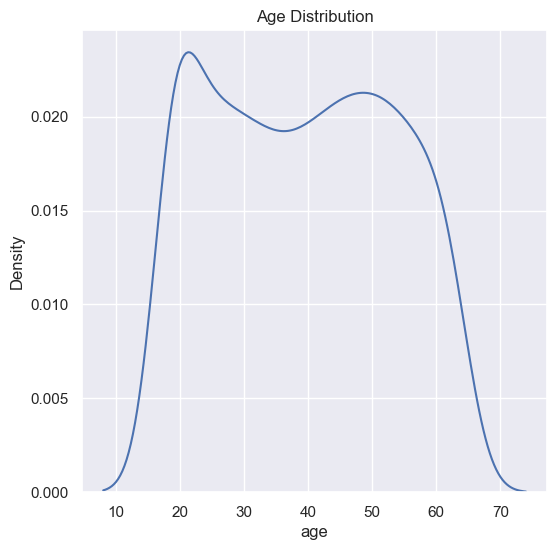

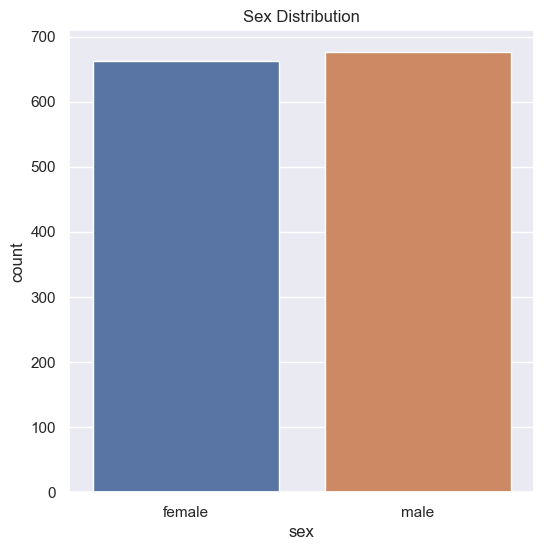

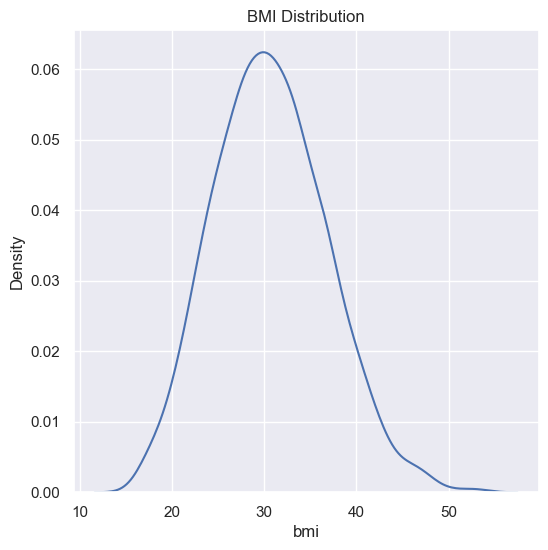

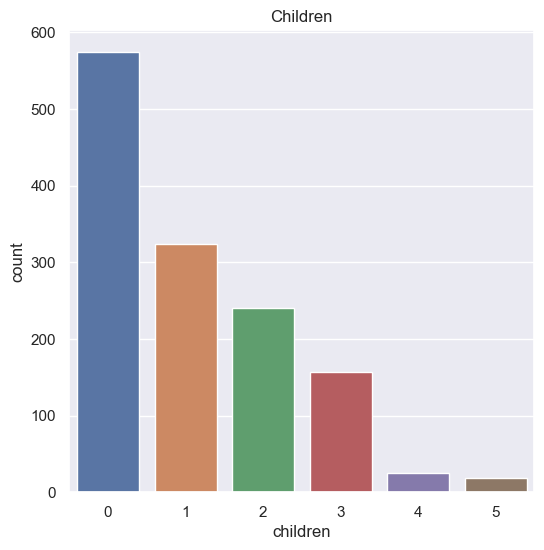

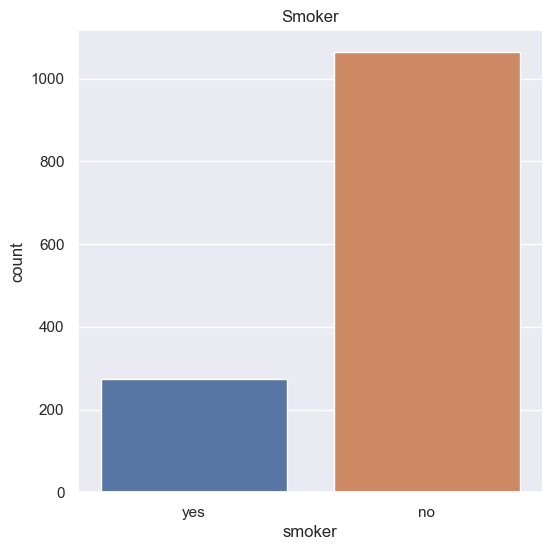

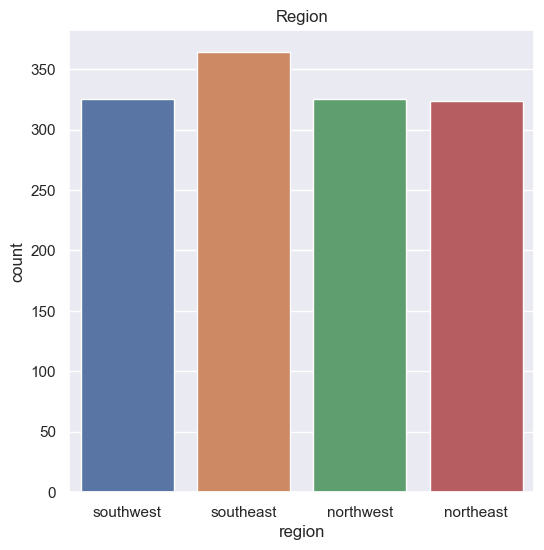

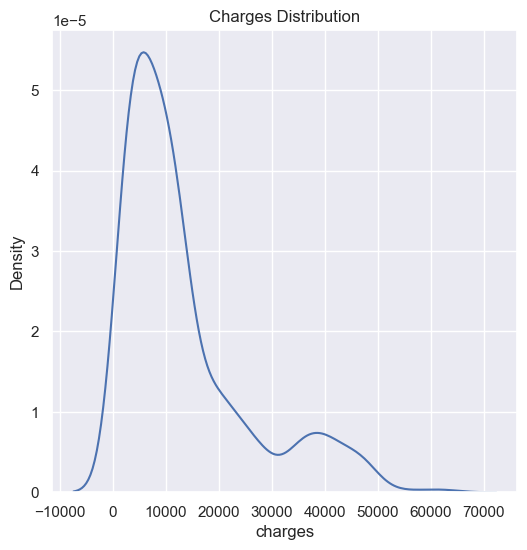

R squared value for training data: 0.751505643411174
R squared value for test data: 0.7447273869684077
The insurance cost is USD 3760.0805764960523


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Loading the data from CSV file into a Pandas DataFrame
insurance_dataset = pd.read_csv('insurance.csv')

# Displaying the first 5 rows of the dataset
insurance_dataset.head()

# Checking the number of rows and columns
insurance_dataset.shape

# Getting information about the dataset
insurance_dataset.info()

# Checking for missing values
insurance_dataset.isnull().sum()

# Displaying statistical measures of the dataset
insurance_dataset.describe()

# Distribution of age values
sns.set()
plt.figure(figsize=(6,6))
sns.kdeplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

# Gender column visualization
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

# BMI distribution
plt.figure(figsize=(6,6))
sns.kdeplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

# Children column visualization
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

# Smoker column visualization
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('Smoker')
plt.show()

# Region column visualization
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('Region')
plt.show()

# Charges distribution
plt.figure(figsize=(6,6))
sns.kdeplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

# Encoding 'sex' column
insurance_dataset.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)

# Encoding 'smoker' column
insurance_dataset.replace({'smoker': {'yes': 0, 'no': 1}}, inplace=True)

# Encoding 'region' column
insurance_dataset.replace({'region': {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}}, inplace=True)

# Splitting the dataset into features and target variable
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Loading and training the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

# Prediction on the training data
training_data_prediction = regressor.predict(X_train)

# R squared value for training data
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value for training data:', r2_train)

# Prediction on the test data
test_data_prediction = regressor.predict(X_test)

# R squared value for test data
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value for test data:', r2_test)

# Input data for prediction
input_data = (31, 1, 25.74, 0, 1, 0)  # age, sex (female=1), bmi, children, smoker (no=1), region (northwest=0)

# Convert the input data into a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Create a pandas DataFrame with the same column names as the training data
input_data_df = pd.DataFrame(input_data_as_numpy_array.reshape(1, -1), columns=X.columns)

# Make a prediction using the trained model
prediction = regressor.predict(input_data_df)

# Print the prediction result
print('The insurance cost is USD', prediction[0])
